In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
slum=pd.read_csv('C:/Users/82102/jongbeom/slum.csv')
gdp=pd.read_csv('C:/Users/82102/jongbeom/gdp.csv')
education=pd.read_csv('C:/Users/82102/jongbeom/education.csv')
intentional_homicides=pd.read_csv('C:/Users/82102/jongbeom/intentional_homicides.csv')
population_density=pd.read_csv('C:/Users/82102/jongbeom/population_density.csv')
unemployment_rate=pd.read_csv('C:/Users/82102/jongbeom/unemployment_rate.csv')
country=pd.read_csv('C:/Users/82102/jongbeom/country.csv')

In [3]:
slum=slum.drop(109, axis=0)
gdp=gdp.drop(109,axis=0)
education=education.drop(109,axis=0)
unemployment_rate=unemployment_rate.drop(109,axis=0)
intentional_homicides=intentional_homicides.drop(109,axis=0)
population_density=population_density.drop(109,axis=0)

In [4]:
ix=[]
for i in range(265):
    ix.append(i)      

In [5]:
slum=pd.DataFrame(slum, index=ix)
gdp=pd.DataFrame(gdp, index=ix)
education=pd.DataFrame(education, index=ix)
intentional_homicides=pd.DataFrame(intentional_homicides, index=ix)
population_density=pd.DataFrame(population_density, index=ix)
unemployment_rate=pd.DataFrame(unemployment_rate, index=ix)

In [6]:
slum[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]
gdp[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]
intentional_homicides[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]
unemployment_rate[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]
population_density[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]
education[['Region','IncomeGroup']]=country[['Region','IncomeGroup']]

In [7]:
data_new=pd.concat([intentional_homicides['Country Name'],intentional_homicides['Region'],intentional_homicides['IncomeGroup']],axis=1)

In [8]:
year=[]
for i in range(4,65):
    year.append(intentional_homicides.columns[i])

In [9]:
intentional_world=[]
for i in range(4,65):
    mn=intentional_homicides.iloc[:,i].mean()
    intentional_world.append(mn)
    

In [10]:
data_world=pd.DataFrame([year, intentional_world],index=['year', 'intentional_world'])
data_world=data_world.transpose()
data_world=data_world.iloc[30:59,]
data_world=data_world.reset_index(drop=True)
data_world['year']=data_world['year'].astype(int)
data_world


,year,intentional_world
0,1990,6.564921
1,1991,7.185408
2,1992,8.175797
3,1993,8.646215
4,1994,10.103178
5,1995,9.485744
6,1996,8.827852
7,1997,8.991471
8,1998,8.505307
9,1999,8.097287


<Figure size 1440x1080 with 0 Axes>

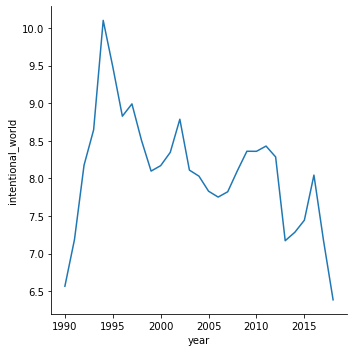

In [11]:
#연도별 살인사건 변화 그래프 1990년부터 2018년까지
plt.figure(figsize=(20,15))
sns.relplot(x='year', y='intentional_world', data=data_world, kind='line')

<AxesSubplot:xlabel='IncomeGroup', ylabel='homicides_Mean'>

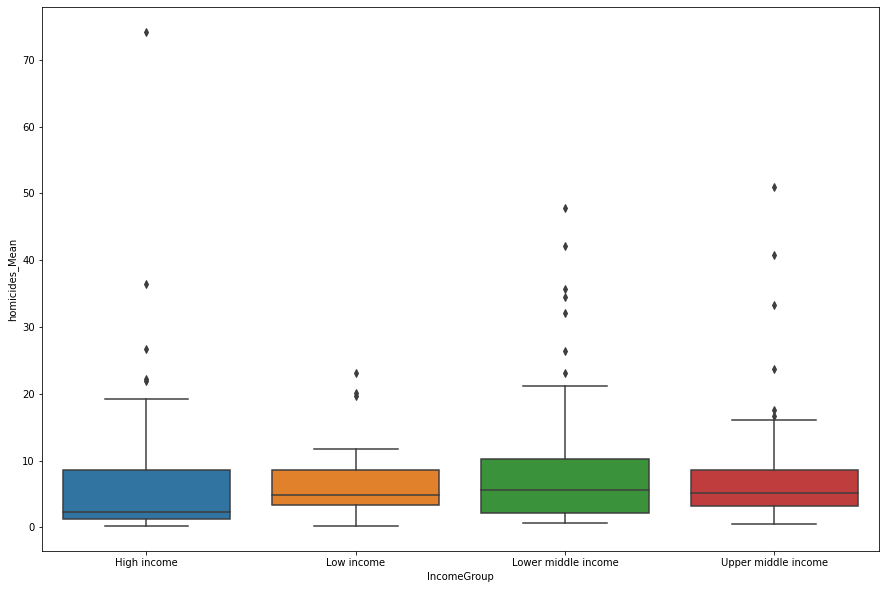

In [35]:
#incomegroup별 살인사건 박스플롯
plt.figure(figsize=(15,10))
m=intentional_homicides.iloc[:,4:65].mean(axis=1)
intentional_homicides['homicides_Mean']=m
sns.boxplot(x='IncomeGroup', y='homicides_Mean', data=intentional_homicides)

<AxesSubplot:xlabel='Region', ylabel='homicides_Mean'>

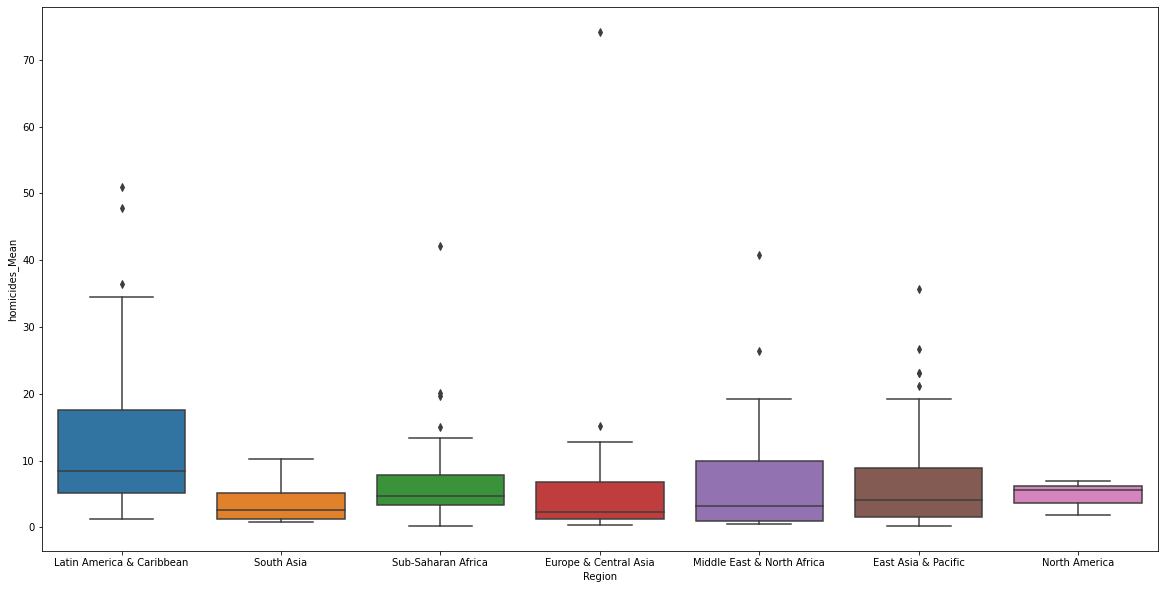

In [13]:
#대륙별 살인사건 박스플롯
plt.figure(figsize=(20,10))
m=intentional_homicides.iloc[:,4:65].mean(axis=1)
intentional_homicides['homicides_Mean']=m
sns.boxplot(x='Region', y='homicides_Mean', data=intentional_homicides)

In [14]:
m=gdp.iloc[:,4:65].mean(axis=1)
gdp['gdp_Mean']=m

In [15]:
m=education.iloc[:,4:65].mean(axis=1)
education['education_Mean']=m

In [16]:
m=slum.iloc[:,4:65].mean(axis=1)
slum['slum_Mean']=m

In [17]:
m=population_density.iloc[:,4:65].mean(axis=1)
population_density['population_density_Mean']=m

In [18]:
m=unemployment_rate.iloc[:,4:65].mean(axis=1)
unemployment_rate['unemployment_rate_Mean']=m

In [19]:
data_mean=pd.concat([intentional_homicides['Country Name'],intentional_homicides['Region'],intentional_homicides['IncomeGroup'],intentional_homicides['homicides_Mean'],gdp['gdp_Mean'],education['education_Mean'],slum['slum_Mean'],population_density['population_density_Mean'],unemployment_rate['unemployment_rate_Mean']],axis=1)

<AxesSubplot:xlabel='gdp_Mean', ylabel='homicides_Mean'>

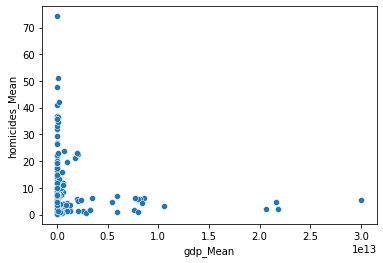

In [20]:
#gdp와 살인사건 산점도
sns.scatterplot(x='gdp_Mean',y='homicides_Mean', data=data_mean)

<AxesSubplot:xlabel='population_density_Mean', ylabel='homicides_Mean'>

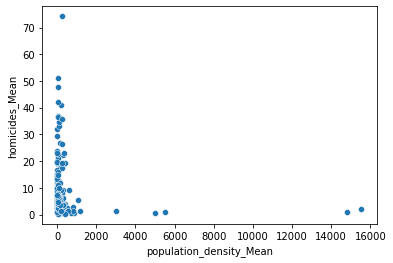

In [23]:
#인구밀도와 살인사건 산점도
sns.scatterplot(x='population_density_Mean',y='homicides_Mean', data=data_mean)

<AxesSubplot:xlabel='education_Mean', ylabel='homicides_Mean'>

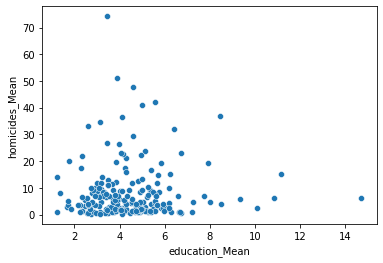

In [26]:
#교육지출과 살인사건 산점도
sns.scatterplot(x='education_Mean',y='homicides_Mean', data=data_mean)

<AxesSubplot:xlabel='unemployment_rate_Mean', ylabel='homicides_Mean'>

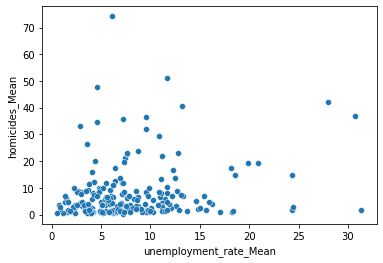

In [29]:
#실업률과 살인사건 산점도
sns.scatterplot(x='unemployment_rate_Mean',y='homicides_Mean', data=data_mean)

<AxesSubplot:xlabel='slum_Mean', ylabel='homicides_Mean'>

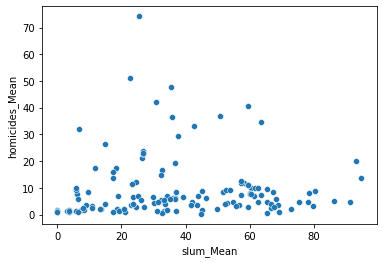

In [30]:
#빈민가와 살인사건 산점도
sns.scatterplot(x='slum_Mean',y='homicides_Mean', data=data_mean)

In [31]:
#살인사건과 실업률의 한국에서의 상관관계를 알아보기 위해서
data_korea=pd.concat([intentional_homicides.iloc[126,4:63],unemployment_rate.iloc[126,4:63]],axis=1,)
data_korea.columns=['intentional_homicides','unemployment_rate']

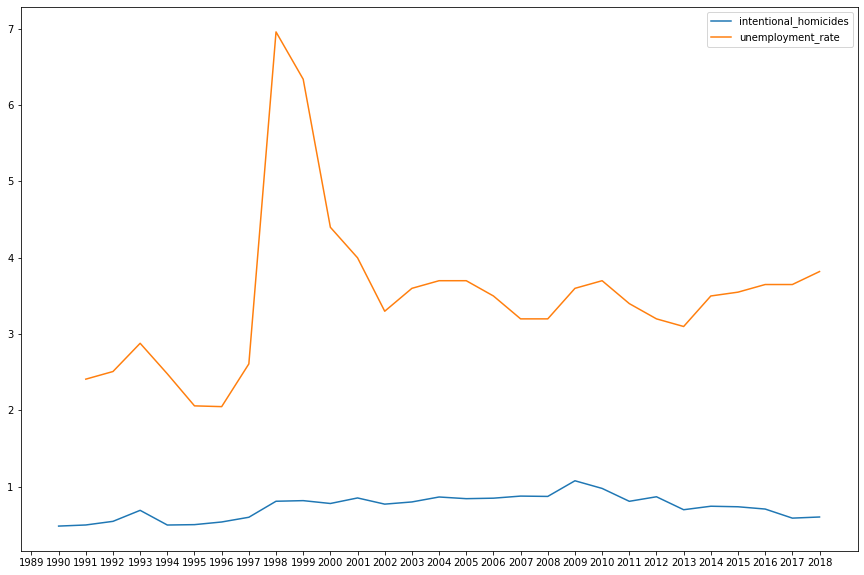

In [34]:
data_korea['year'] = data_korea.index
data_korea.index=range(len(data_korea['year']))
plt.figure(figsize=(15,10))
plt.plot(data_korea['year'],data_korea['intentional_homicides'],label='intentional_homicides')
plt.plot(data_korea['year'],data_korea['unemployment_rate'],label='unemployment_rate')
plt.legend()